<a href="https://colab.research.google.com/github/dhfqoal/AI_LAB/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.8.0+cu126
2.8.0+cu126
Loaded file: /content/095522039.m4a


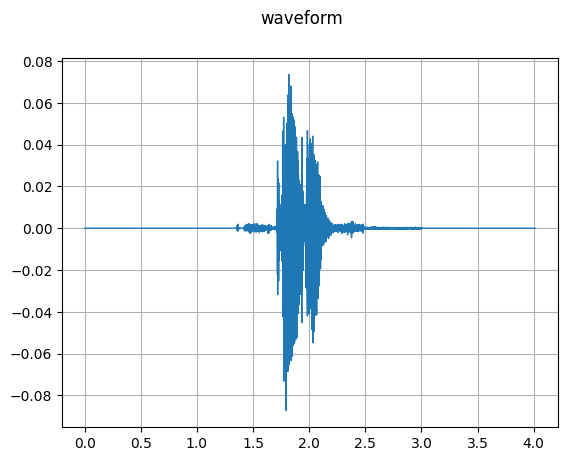

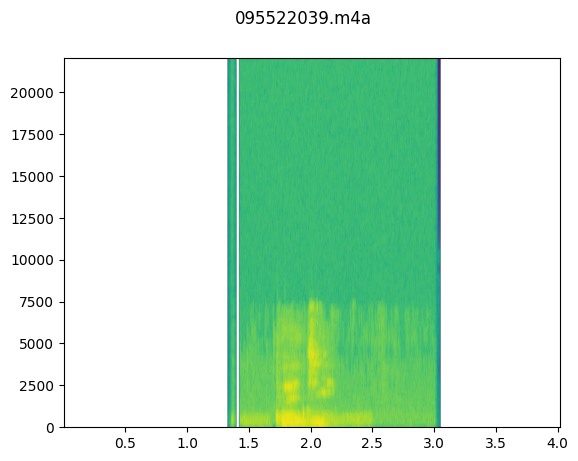

Loaded file: /content/095522040.m4a


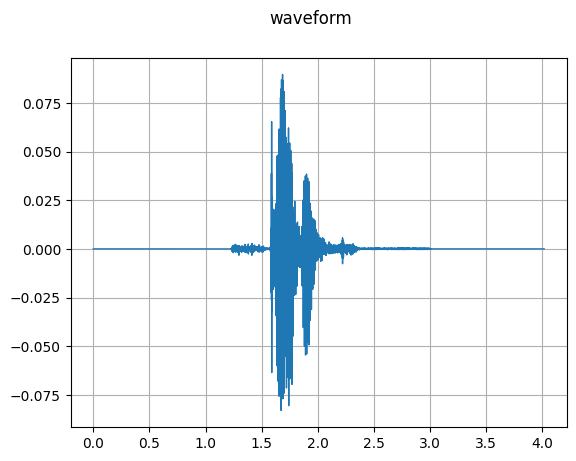

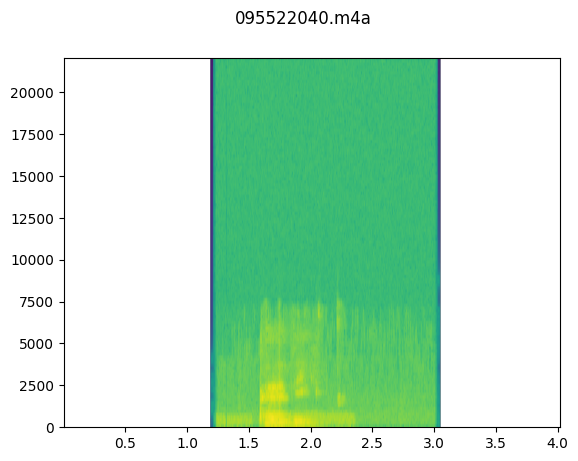

Loaded file: /content/095522041.m4a


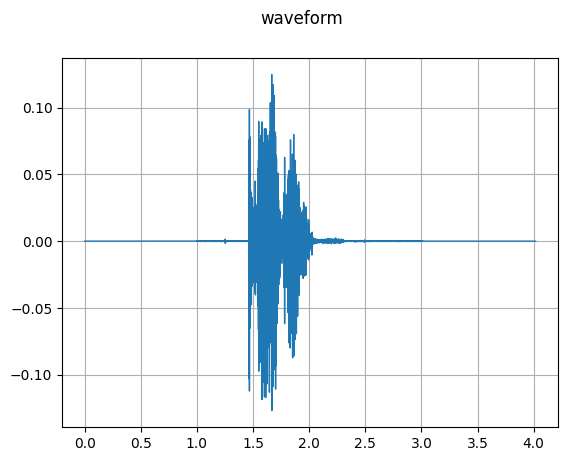

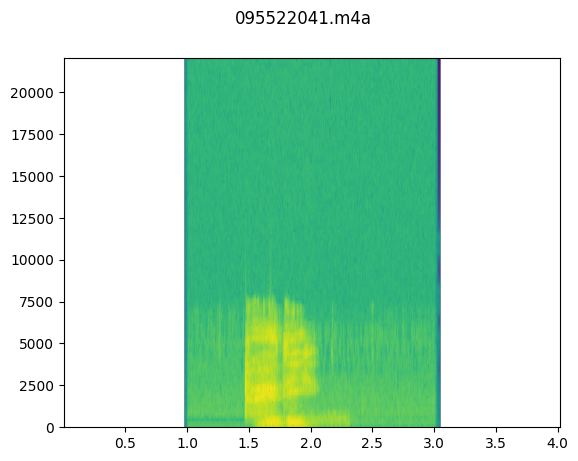

Loaded file: /content/095522042.m4a


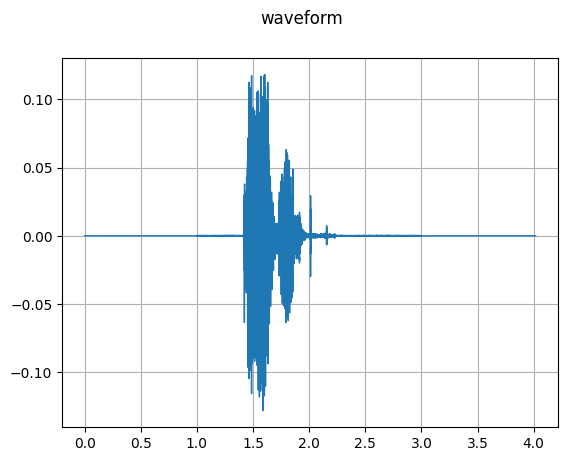

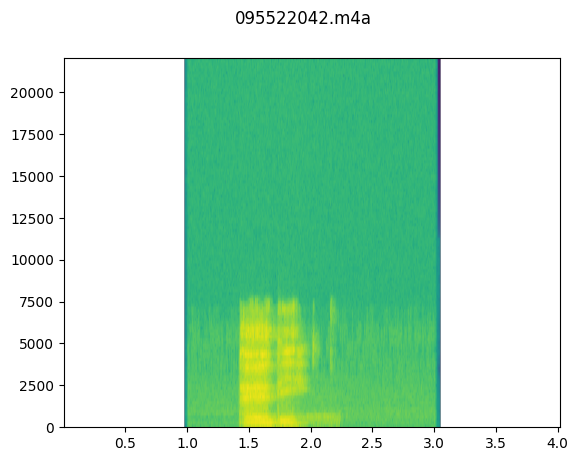

In [9]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)
import io
import os
import tarfile
import tempfile

import boto3
import matplotlib.pyplot as plt
import requests
from botocore import UNSIGNED
from botocore.config import Config
from IPython.display import Audio
from torchaudio.utils import download_asset

audio_dataset = ["/content/095522039.m4a",
                 "/content/095522040.m4a",
                 "/content/095522041.m4a",
                 "/content/095522042.m4a"

]

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show()

def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)
    plt.show()

for file_path in audio_dataset:
    try:
        waveform, sample_rate = torchaudio.load(file_path)
        print(f"Loaded file: {file_path}")

        # 파일명을 제목으로 사용하기 위해 경로에서 파일명 추출
        file_name = file_path.split('/')[-1]

        plot_waveform(waveform, sample_rate)
        plot_specgram(waveform, sample_rate, file_name)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
